### Notebook to make plots with final results from saved data

In [146]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage.filters import gaussian_filter1d
import pandas as pd
import calendar 
from matplotlib.font_manager import FontProperties
from scipy.interpolate import CubicSpline, BSpline
from scipy.optimize import leastsq, curve_fit

%run simulate_radiances_utils.py
%run mean_analysis_utils.py
%run locations.py


# font = {'weight' : 'bold',
#         'size'   : 12}
# label_fontdict = {'weight' : 'bold',
#         'size'   : 12}
# title_fontdict = {'weight' : 'bold',
#         'size'   : 12}

# matplotlib.rc('font', **font)

In [147]:
save_final_data_dir = '/net/fluo/data2/groupMembers/cchristo/final_results/data/'
# save_final_figs_dir = '/net/fluo/data2/groupMembers/cchristo/final_results/figs/'
save_final_figs_dir = '/home/cchristo/proj_christian/final_results/figs/'




In [3]:
os.listdir(save_final_data_dir)

['CH4_rf_timeseries.nc',
 'CO2_rf_timeseries.nc',
 'CO2_eh_radiance_weighted_timeseries.nc']

## Plot rf timeseries

In [23]:
rf_timeseries_ds_co2 = xr.open_dataset(save_final_data_dir + 'CO2_rf_timeseries.nc')
rf_timeseries_ds_ch4 = xr.open_dataset(save_final_data_dir + 'CH4_rf_timeseries.nc')

Text(0.5, 1.0, 'SMT $CH_{4}$ Surface Forcing')

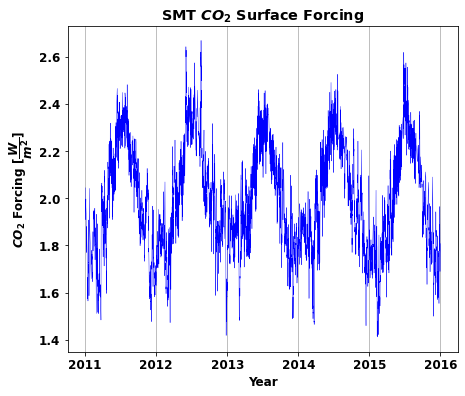

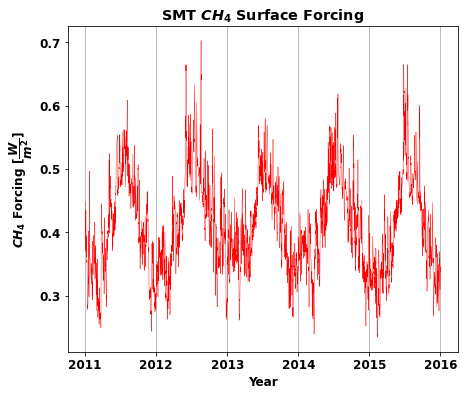

In [64]:
xx, yy = rf_timeseries_ds_co2['time'].values, \
         rf_timeseries_ds_co2['lw_down_total'].values
    
plt.figure(figsize = (7,6))
plt.plot(xx, yy, c = 'blue', linewidth = 0.4)
plt.gca().xaxis.grid()
plt.ylabel(r'$CO_{2}$ Forcing $[\dfrac{W}{m^{2}}]$', weight = 'bold')
plt.xlabel('Year', weight = 'bold')
plt.title('SMT $CO_{2}$ Surface Forcing', weight = 'bold')
# plt.savefig(save_final_figs_dir + 'rf_timeseries_CO2.png', dpi = 300)

xx, yy = rf_timeseries_ds_ch4['time'].values, \
         rf_timeseries_ds_ch4['lw_down_total'].values
    
plt.figure(figsize = (7,6))
plt.plot(xx, yy, c = 'r', linewidth = 0.4)
plt.gca().xaxis.grid()
plt.ylabel(r'$CH_{4}$ Forcing $[\dfrac{W}{m^{2}}]$', weight = 'bold')
plt.xlabel('Year', weight = 'bold')
plt.title('SMT $CH_{4}$ Surface Forcing', weight = 'bold')
# plt.savefig(save_final_figs_dir + 'rf_timeseries_CH4.png', dpi = 300)



In [108]:

dt_index = pd.DatetimeIndex(xx)
month_ind = [(time_i.year - 2011)*12 + (time_i.month - 1) + \
             (time_i.day/calendar.monthrange(time_i.year, time_i.month)[1]) for time_i in dt_index]
# rf_timeseries_ds_co2.time

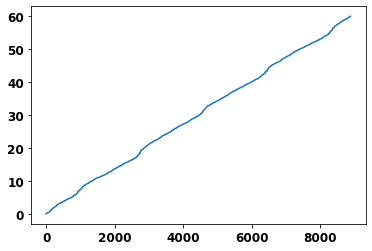

In [112]:
plt.plot(month_ind)

In [129]:

x0 = np.array([0.5, 6])
# out = leastsq(sin_func, x0, args=(month_ind, \
#                                   rf_timeseries_ds_co2['lw_down_total'].values))

out = curve_fit(sin_func, month_ind, \
                         rf_timeseries_ds_ch4['lw_down_total'].values)

In [130]:
out

(array([-0.05280398,  1.01641055]),
 array([[3.54298150e-05, 1.73188406e-06],
        [1.73188406e-06, 1.08559908e-05]]))

In [142]:
eh_timeseries_ds_co2 = xr.open_dataset(save_final_data_dir + 'CO2_eh_radiance_weighted_timeseries.nc')
eh_timeseries_ds_ch4 = xr.open_dataset(save_final_data_dir + 'CH4_eh_radiance_weighted_timeseries.nc')




In [134]:
eh_timeseries_ds_co2.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:                        (time: 8886)
Coordinates:
  * time                           (time) datetime64[ns] 2011-01-01T16:30:00 ... 2015-12-31T16:30:00
Data variables:
    __xarray_dataarray_variable__  (time) float64 759.4 754.6 ... 716.9 706.8>

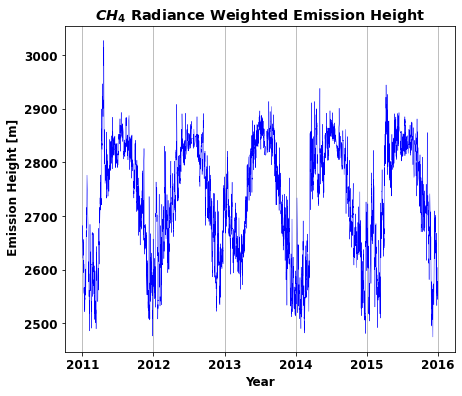

In [145]:
xx, yy = eh_timeseries_ds_ch4['time'].values, \
         eh_timeseries_ds_ch4['__xarray_dataarray_variable__'].values
    
plt.figure(figsize = (7,6))
plt.plot(xx, yy, c = 'b', linewidth = 0.4)
plt.gca().xaxis.grid()
plt.ylabel(r' Emission Height [m]', weight = 'bold')
plt.xlabel('Year', weight = 'bold')
plt.title('$CH_4$ Radiance Weighted Emission Height', weight = 'bold')
# plt.savefig(save_final_figs_dir + 'r_weighted_e_height_ch4.png', dpi = 300)

In [148]:
os.listdir(save_final_data_dir)

['CH4_rf_timeseries.nc',
 'CO2_rf_timeseries.nc',
 'CO2_eh_radiance_weighted_timeseries.nc',
 'CH4_eh_radiance_weighted_timeseries.nc',
 'forcing_spectral_residual_CO2_summer_mean.nc',
 'forcing_spectral_residual_CO2_winter_mean.nc']

## Seasonally Averaged Spectral Residual Plot

In [162]:
co2_spec_resid_summer = xr.open_dataset(save_final_data_dir + 'forcing_spectral_residual_CO2_summer_mean.nc')
co2_spec_resid_winter =  xr.open_dataset(save_final_data_dir + 'forcing_spectral_residual_CO2_winter_mean.nc')


ch4_spec_resid_summer = xr.open_dataset(save_final_data_dir + 'forcing_spectral_residual_CH4_summer_mean.nc')
ch4_spec_resid_winter =  xr.open_dataset(save_final_data_dir + 'forcing_spectral_residual_CH4_winter_mean.nc')

In [155]:
spec_resid_summer['lw_down_ta']

<xarray.Dataset>
Dimensions:        (nu: 130806)
Coordinates:
  * nu             (nu) float64 491.8 491.8 491.8 ... 1.8e+03 1.8e+03 1.8e+03
    season         object ...
Data variables:
    lw_down_total  (nu) float64 ...

In [176]:
# co2_spec_resid_summer.nu.values.min()
rr = co2_spec_resid_summer['lw_down_total'].values

np.where(rr>0,rr, np.nan)

array([7.76677477e-06, 7.05749505e-06, 6.18549195e-06, ...,
       7.08148817e-14, 2.75604192e-13, 4.62802539e-14])

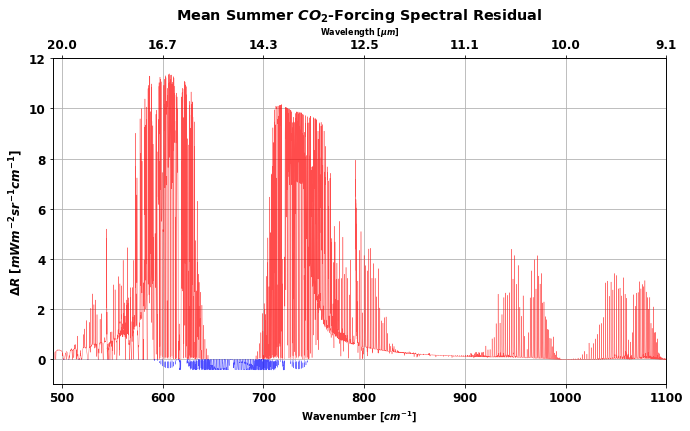

In [268]:
%run mean_analysis_utils.py
plot_forcing_spectral_residual(co2_spec_resid_summer['lw_down_total'].values,
                               co2_spec_resid_summer.nu.values,
                               title = r'Mean Summer $CO_2$-Forcing Spectral Residual',
                               ylims = [-1, 12],
                               xlims = [491, 1100])

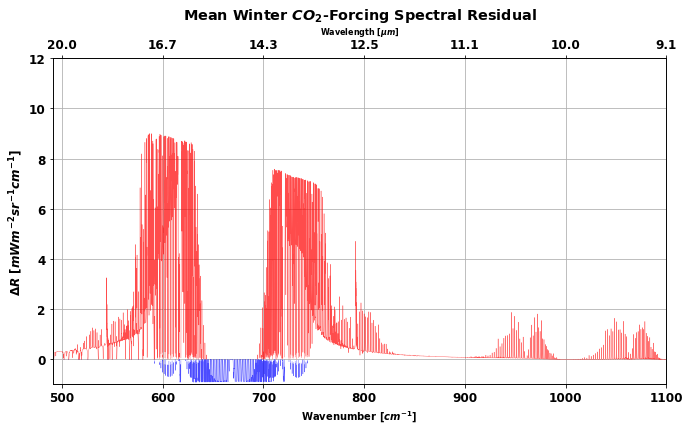

In [269]:
plot_forcing_spectral_residual(co2_spec_resid_winter['lw_down_total'].values,
                               co2_spec_resid_winter.nu.values,
                               r'Mean Winter $CO_2$-Forcing Spectral Residual',
                               ylims = [-1, 12],
                               xlims = [491, 1100])

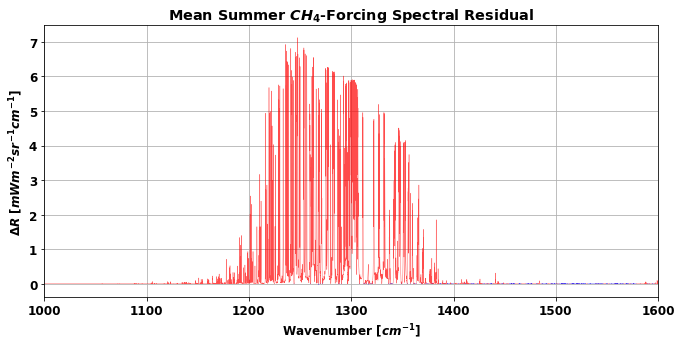

In [230]:
plot_forcing_spectral_residual(ch4_spec_resid_summer['lw_down_total'].values,
                               ch4_spec_resid_summer.nu.values,
                               r'Mean Summer $CH_4$-Forcing Spectral Residual',
                               xlims = [1000, 1600])

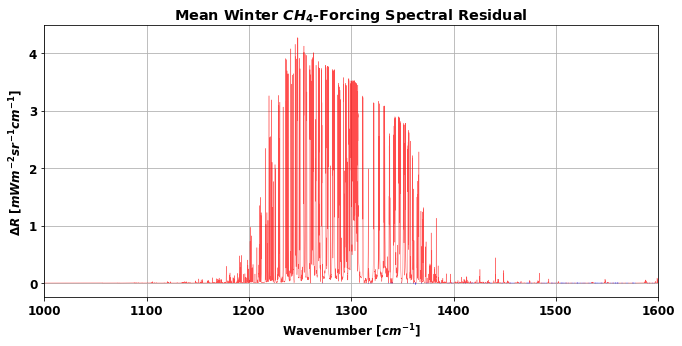

In [231]:
plot_forcing_spectral_residual(ch4_spec_resid_winter['lw_down_total'].values,
                               ch4_spec_resid_winter.nu.values,
                                r'Mean Winter $CH_4$-Forcing Spectral Residual',
                               xlims = [1000, 1600])